## Black Friday Sales Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
train_data=pd.read_csv("/content/black_friday_train.csv")

In [3]:
train_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
test_data=pd.read_csv("/content/black_friday_test.csv")

In [5]:
test_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
print("Train Data :", train_data.shape)
print("Test Data  :",test_data.shape)

Train Data : (550068, 12)
Test Data  : (233599, 11)


- Total 7,83,667 datapoints and 12 features

In [7]:
df=pd.concat([train_data,test_data]) #combine the both train and test data

In [8]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [9]:
df.shape

(783667, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


- By above info product_categories and purchase have more null values

In [11]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,245982


In [12]:
df.duplicated().sum()

0

- No duplicates in the data

In [13]:
df.columns  # what are the features in the dataset

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [14]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [15]:
df['User_ID'].value_counts()

,count
User_ID,
1001680,1468
1004277,1384
1001941,1286
1001181,1230
1000889,1204
...,...
1004991,13
1000708,13
1000572,13


In [16]:
# user_id is much important feature in the data. Drop the user_id column
df.drop('User_ID',axis=1,inplace=True)

In [17]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [18]:
df["Product_ID"].nunique()

3677

In [19]:
df["Age"].value_counts()

,count
Age,
26-35,313015
36-45,156724
18-25,141953
46-50,65278
51-55,54784
55+,30579
0-17,21334


In [20]:
#convert the age into numerical values
df['Age']=df['Age'].map({'0-17':0,"18-25":1,"26-35":2,"36-45":3,"46-50":4,"51-55":5,"55+":6})

In [21]:
df["Age"].value_counts()

,count
Age,
2,313015
3,156724
1,141953
4,65278
5,54784
6,30579
0,21334


In [22]:
print(df["Occupation"].unique())
df['Occupation'].value_counts()


[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]


,count
Occupation,
4,103086
0,98850
7,84127
1,67687
17,57418
20,47840
12,44448
14,38782
2,37996


In [23]:
df["City_Category"].value_counts()

,count
City_Category,
B,329739
C,243684
A,210244


In [24]:
df["Stay_In_Current_City_Years"].value_counts()

,count
Stay_In_Current_City_Years,
1,276425
2,145427
3,135428
4+,120671
0,105716


In [25]:
# stay in current city years feature have 4+ value, wer change the value into 4
df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].str.replace("4+","4")

In [26]:
df["Stay_In_Current_City_Years"].value_counts()

,count
Stay_In_Current_City_Years,
1,276425
2,145427
3,135428
4,120671
0,105716


- By above observation of the features we must convert the features values into simple values to peform EDA.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  object 
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          537685 non-null  float64
 9   Product_Category_3          237858 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 71.7+ MB


### Exploratory Data Analysis

<Axes: xlabel='Age', ylabel='Purchase'>

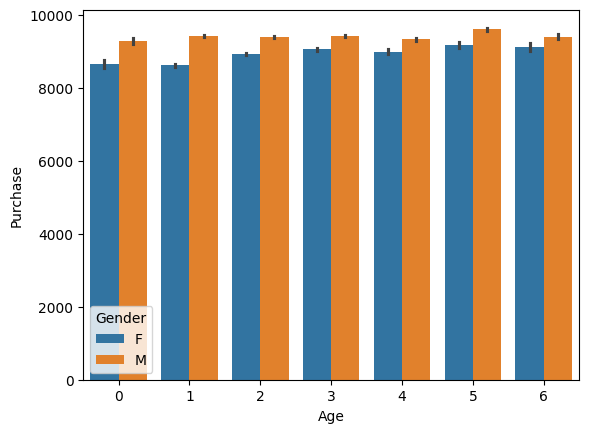

In [28]:
sns.barplot(x='Age',y='Purchase',hue="Gender",data=df)

<Axes: xlabel='Age', ylabel='Purchase'>

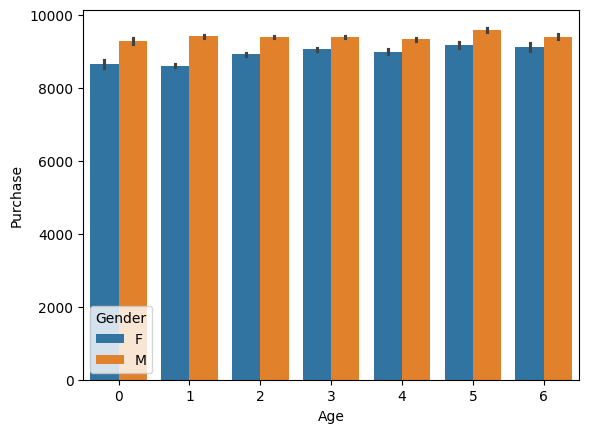

In [29]:
sns.barplot(x='Age',y='Purchase',hue="Gender",data=df)

<Axes: xlabel='Occupation', ylabel='Purchase'>

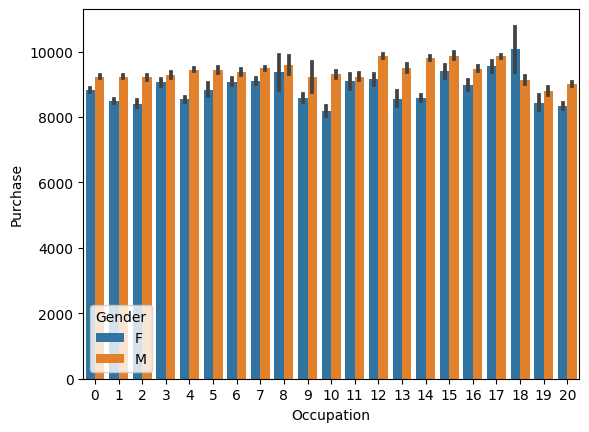

In [ ]:
sns.barplot(x='Occupation',y='Purchase',hue="Gender",data=df)

<Axes: xlabel='City_Category', ylabel='Purchase'>

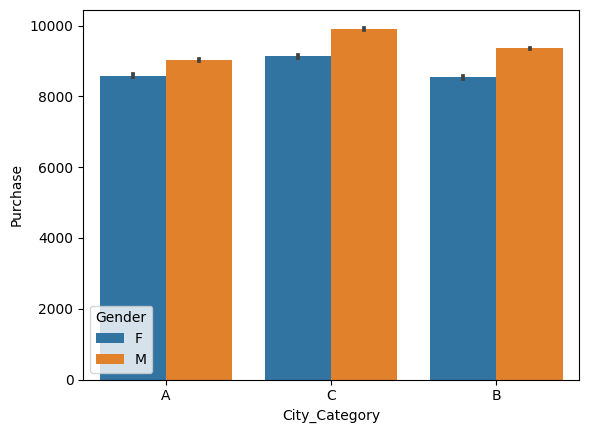

In [ ]:
sns.barplot(x='City_Category',y='Purchase',hue="Gender",data=df)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

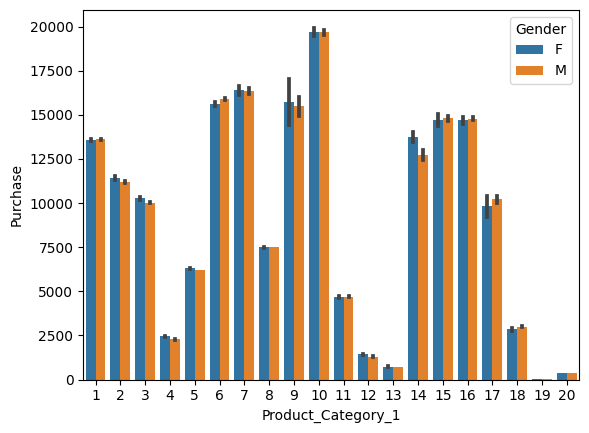

In [ ]:
sns.barplot(x='Product_Category_1',y='Purchase',hue="Gender",data=df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

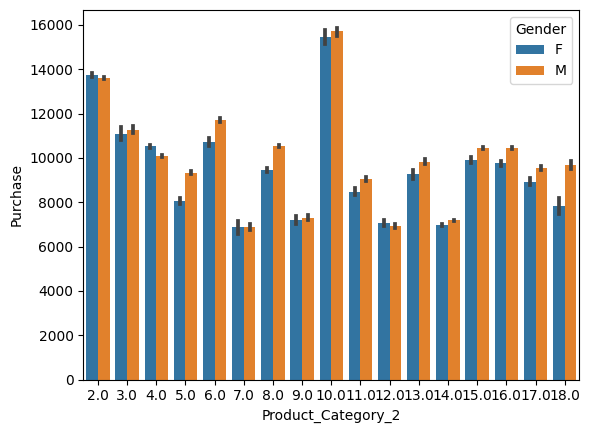

In [ ]:
sns.barplot(x='Product_Category_2',y='Purchase',hue="Gender",data=df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

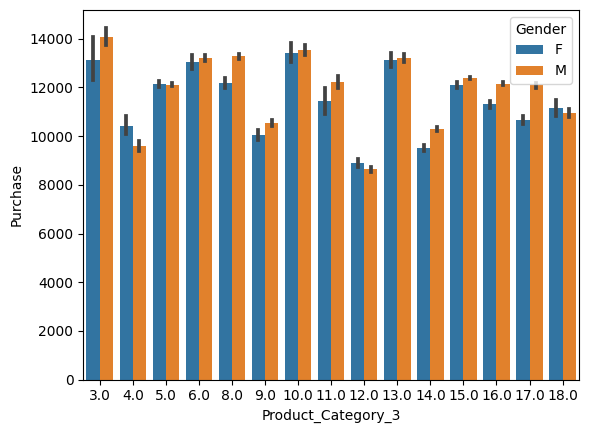

In [ ]:
sns.barplot(x='Product_Category_3',y='Purchase',hue="Gender",data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

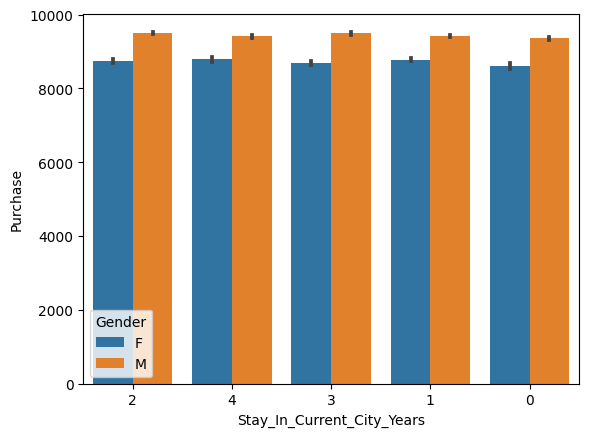

In [ ]:
sns.barplot(x='Stay_In_Current_City_Years',y='Purchase',hue="Gender",data=df)

### Observation
- Men purchase higher than women
- Product_category 1 and 2 product 10 have highest purchase.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  object 
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          537685 non-null  float64
 9   Product_Category_3          237858 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 71.7+ MB


In [31]:
df["City_Category"]=df["City_Category"].map({"A":0,"B":1,"C":2})
df["Gender"]=df["Gender"].map({"M":1,"F":0})
df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].astype("int")

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          537685 non-null  float64
 9   Product_Category_3          237858 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 71.7+ MB


In [33]:
df.isnull().sum()

,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,245982
Product_Category_3,545809


In [34]:
print("Median of Product_2",df['Product_Category_2'].median())
print("Mean of Product_2",df['Product_Category_2'].mean())
print("Mode of Product_2",df['Product_Category_2'].mode())

Median of Product_2 9.0
Mean of Product_2 9.844505612021909
Mode of Product_2 0    8.0
Name: Product_Category_2, dtype: float64


In [35]:
#we replace the product category with mode value because product category have few values only
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [36]:
df.isnull().sum()

,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0
Product_Category_3,0


## Model Training and Evalution

In [37]:
df.drop("Product_ID",axis=1,inplace=True)

In [38]:
# spliting the train and test data with purchase null value
train=df[~df["Purchase"].isnull()]

In [39]:
train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,8.0,16.0,8370.0
1,0,0,10,0,2,0,1,6.0,14.0,15200.0
2,0,0,10,0,2,0,12,8.0,16.0,1422.0
3,0,0,10,0,2,0,12,14.0,16.0,1057.0
4,1,6,16,2,4,0,8,8.0,16.0,7969.0


In [40]:
test=df[df['Purchase'].isnull()]

In [41]:
test.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,4,7,1,2,1,1,11.0,16.0,NaN
1,1,2,17,2,0,0,3,5.0,16.0,NaN
2,0,3,1,1,4,1,5,14.0,16.0,NaN
3,0,3,1,1,4,1,4,9.0,16.0,NaN
4,0,2,1,2,1,0,4,5.0,12.0,NaN


In [42]:
test.drop("Purchase",axis=1,inplace=True)

In [43]:
X=train.drop("Purchase",axis=1)
y=train["Purchase"]

In [44]:
print(X.shape)
X.head()

(550068, 9)


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,0,10,0,2,0,3,8.0,16.0
1,0,0,10,0,2,0,1,6.0,14.0
2,0,0,10,0,2,0,12,8.0,16.0
3,0,0,10,0,2,0,12,14.0,16.0
4,1,6,16,2,4,0,8,8.0,16.0


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [46]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [47]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [48]:
def evalution(actual,prediction):
    mse=mean_squared_error(actual,prediction)
    mae=mean_absolute_error(actual,prediction)
    rms=np.sqrt(mean_squared_error(actual,prediction))
    r2=r2_score(actual,prediction)

    return mse,mae,rms,r2

In [49]:
models={
    # "linearRegressor":LinearRegression(),
    # "Ridge":Ridge(),
    # "Lasso":Lasso(),
    # "KNN":KNeighborsRegressor(),
    # "DecisionTree":DecisionTreeRegressor(),
    # "SVR":SVR(),
    "RandomForest":RandomForestRegressor(),
    "AdaBoost":AdaBoostRegressor(),
    "XGB":XGBRegressor(),
}

In [50]:
models_list=[]
accuracy=[]

for i in range(len(models)):
    model=list(models.values())[i]
    #train model
    model.fit(X_train,y_train)

    #predictions
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    #get the accuracy score for train and test dataset
    train_mse,train_mae,train_rms,train_r2=evalution(y_train,y_train_pred)
    test_mse,test_mae,test_rms,test_r2=evalution(y_test,y_test_pred)

    #print the model and the accuracy scores

    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])

    #Train dataset score
    print("Training data score")
    print("MSE",train_mse)
    print("MAE",train_mae)
    print("RMS",train_rms)
    print("R2",train_r2)

    #Test dataset score
    print("Test data scores")
    print("MSE",test_mse)
    print("MAE",test_mae)
    print("RMS",test_rms)
    print("R2",test_r2)

    accuracy.append(test_r2)

    print('='*50)
    print("\n")

RandomForest
Training data score
MSE 5362647.767139524
MAE 1667.0423671800313
RMS 2315.7391405638773
R2 0.7875772517264339
Test data scores
MSE 9342125.450720496
MAE 2225.7933175985036
RMS 3056.4890725668392
R2 0.6293188063615665


AdaBoost
Training data score
MSE 14995582.707491664
MAE 3048.6587600501707
RMS 3872.413034206406
R2 0.40600184293139574
Test data scores
MSE 15056806.066973781
MAE 3053.2435426959055
RMS 3880.3100477891944
R2 0.40256905404135823


XGB
Training data score
MSE 8077910.938381936
MAE 2128.4252919542078
RMS 2842.166592299251
R2 0.6800214900641361
Test data scores
MSE 8391098.975126259
MAE 2165.1845459778715
RMS 2896.739369554372
R2 0.6670540766717973


